# Introduction to Machine Learning
Written by Sumner Hearth

#### Overview:
- What is machine learning?
- Why is it useful?
- How do we go about it?

## What is Machine Learning?
Machine Learning (ML) is a large field of related studies all centered around algorithms which allow computers to make predictions based on datasets of examples. For example if I gave you a selection of fruit of various colors you would likely be able to taste them to determine which colors taste best and which colors to avoid (think Red/Green apples and whether or not you have a preference).

In general we represent examples as points in space. So we could turn the color of the apple (Red to Green) to a number, and the squishiness of the apple to another number. We can call this point $\vec{x} = (x, y)$. Then we could plot out the positions of the apples in this *Squishy-Color* space and color-code the points to see if the apples were tasty or not.

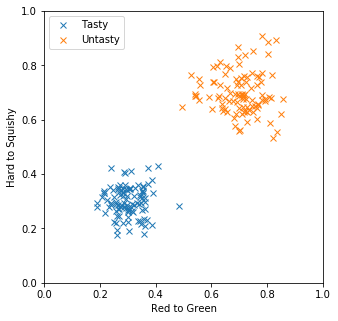

In [124]:
%matplotlib inline
from matplotlib import pyplot
import numpy

# Make 3D for later
tasty_apples = numpy.random.randn(100,3)*0.05 + 0.3
untasty_apples = numpy.random.randn(100,3)*0.075 + 0.7

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")
ax.legend()
pyplot.show()

Now you can see that tasty apples seem to be around the bottom-left (otherwise known as Red and Hard), whereas untasty apples are clustered around the Squishy-Green area at the top right.

![title](http://imgs.xkcd.com/comics/fuck_grapefruit.png)

We are not limited to two dimentions, however. We could just as easily add another dimension for the shape of the apple, let's say 0 means perfectly spherical and the further from 0 the more oddly shaped it is.

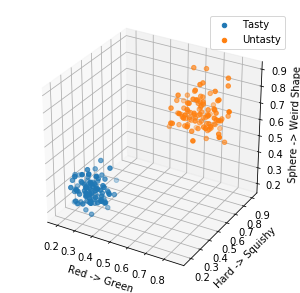

In [125]:
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tasty_apples[:,0],tasty_apples[:,1],tasty_apples[:,2],'x',label="Tasty")
ax.scatter(untasty_apples[:,0],untasty_apples[:,1],untasty_apples[:,2],'x',label="Untasty")
ax.set_xlabel('Red -> Green')
ax.set_ylabel('Hard -> Squishy')
ax.set_zlabel('Sphere -> Weird Shape')
ax.legend()
pyplot.show()

Now you can see that the tasty apples are mostly Red, Hard, and Spherical. We aren't limited by 3 dimensions, we could, for example, have each apple be measured by any number of dimensions (Color, Firmness, Shape, Texture, Length of Stem, Total bruised area, ...). And even though we can't plot the resulting points reasonably we can run ML algorithms on them.

## Why is ML Useful?
ML allows computers to make predictions about the data. So, in theory, we would be able to take the information about an apple (Color, etc...) and have a computer decide if it will be tasty or not. Perhaps a grocery store could set up an automatic ML based product system so that they automatically buy only tasty apples from the local farm, and since it's a machine deciding if they are likely to be tasty or not it can be done far more quickly than if a human were making the purchase.

The example above is only one of millions of potential uses. Every day companies and organizations use ML techniques to make decisions faster than humans would be able to. It's how Siri decides what you said, it's how Google chooses what links to show you when you search something, it's ubiquitous now more than ever.

Enough talk though, let's get down to it

## How do we *do* ML?

Let's look at the above example with apples in 2D again

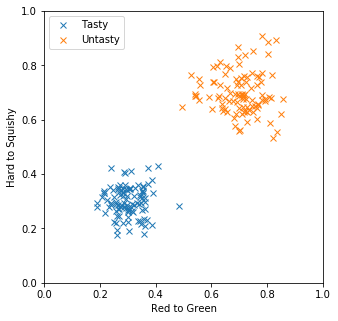

In [126]:
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")
ax.legend()
pyplot.show()

We already mentioned that it looked like the tasty apples lived on one side (bottom left) and the untasty apples on the other side (top right) of some line. Our first ML algorithm assumes exactly that, and will try to find the line which divides the two things. This algorithm is called the **Perceptron**. First let's talk a little bit about lines:

The general equation for a line is: $y = mx + b$, here $m$ is the slope of the line and $b$ is how far it is from the origin. We could say *If the x coordinate of the point, times the slope, plus b is greater than the y coordinate of the point, then the apple is Tasty, otherwise it's untasty*, but that is not a great way to do it because it doesn't generalize well (remember we were doing more than 2 dimensions? How would this line thing work in 3D?). Instead what we do is draw a line *perpendicular* to the actual line we want, this is called the normal (or weights) which we write as $\vec{w}$

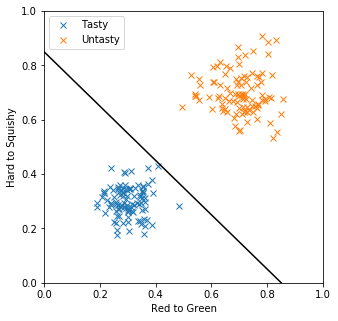

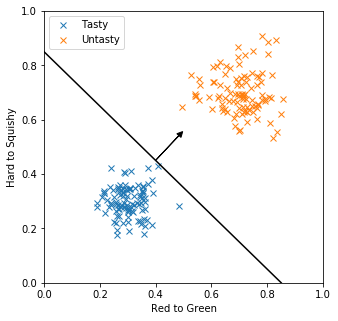

In [127]:
m = -1
b = 0.85
arrow_scale = 6
def y(x):
    return m*x + b
def y_inv(y):
    return (y-b)/float(m)

fig, ax = pyplot.subplots(figsize=(5, 5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.plot([0,y_inv(0)],[y(0),0],'k-')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")
ax.legend()
pyplot.show()

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.plot([0,y_inv(0)],[y(0),0],'k-')
ax.arrow(0.4,y(0.4),0.5/arrow_scale, (-(0.5-0.4)*m + y(0.4))/arrow_scale, 
         head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")
ax.legend()
pyplot.show()

This perpendicular line can be seen as an arrow and a point where things the arrow points towards are untasty and things the arrow points away from are tasty. It turns out there's a nice mathematical way to do this in any dimension called the *dot-product*. Let's say the arrow goes from the point $(a, b)$ to the point $(c, d)$. What we do is shift the whole world over so that the arrow starts at $(0,0)$ and goes to $(c - a, d - b)$ (which we will now call $(w_0, w_1)$). Recall how we said that points were given by $\vec{x} = (x, y)$? Well we shifted stuff over, so now it's $\vec{x} = (x - a, y - b)$, and let's call it $\vec{x} = (x_0, x_1)$.

Ok, so now the world looks like this:

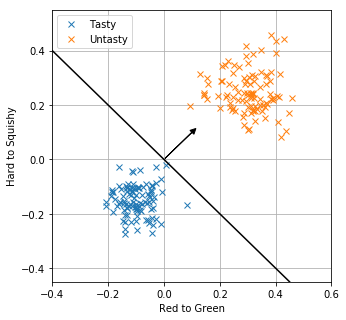

In [128]:
arrow_scale = 1
def y(x,m=-1,b=0.85):
    return m*x + b
def y_inv(y,m=-1,b=0.85):
    return (y-b)/float(m)

s_tasty_apples = numpy.copy(tasty_apples)
s_untasty_apples = numpy.copy(untasty_apples)
s_tasty_apples[:,0] -= 0.4
s_tasty_apples[:,1] -= y(0.4)
s_untasty_apples[:,0] -= 0.4
s_untasty_apples[:,1] -= y(0.4)

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(s_tasty_apples[:,0],s_tasty_apples[:,1],'x',label="Tasty")
ax.plot(s_untasty_apples[:,0],s_untasty_apples[:,1],'x',label="Untasty")
ax.plot([0 - 0.4,y_inv(0) - 0.4],[y(0) - y(0.4),0 - y(0.4)],'k-')
ax.arrow(0,0,0.5/arrow_scale - 0.4, (-(0.5-0.4)*m + y(0.4))/arrow_scale - y(0.4), 
         head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.set_xlim([0-0.4,1-0.4])
ax.set_ylim([0-y(0.4),1-y(0.4)])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")
ax.legend()
ax.grid()
pyplot.show()

Notice how the base of the arrow is at zero? This shift is what happens when you set $b = 0$ and shift the world accordingly, it real examples we don't set $b$ to zero exactly, but do a neat trick instead. Now how do we tell if a point $\vec{x} = (x_0, x_1)$ is in front of or behind the arrow? 

We use the following formula: 
$\vec{w} \cdot \vec{x} = w_0 \times x_0 + w_1 \times x_1$
Which I will write as $w_0 x_0 + w_1 x_1$ to save space (you can be fancy and write $\sum_{i} w_i x_i$ if you want to generalize to more dimentions)

As it turns out this formula will be positive if the point is in front of the arrow and negative if it's behind the arrow. Thus if we want to find out if an apple looks tasty we just do:
$$ h(\vec{x}) = \mbox{ if } \vec{w} \cdot \vec{x} + b < 0: tasty  \\ \mbox{ else }: untasty $$

Notice how we are using the equation $\vec{w} \cdot \vec{x} + b$? That's basically the same as making $\vec{w} = (w_0, w_1, b)$ and adding a $1$ to all the $\vec{x} = (x_0, x_1, 1)$. Now the equation gives $\vec{w} \cdot \vec{x} \rightarrow w_0 x_0 + w_1 x_1 + b$ which is like the old equation where $b$ was separated!

Now if we can find the vector $\vec{w} = (w_0, w_1, b)$ we can *learn* how to classify the apples into tasty and untasty.

#### Perceptron:

The perceptron algorithm learns the real $\vec{w}$ by repeatedly correcting its own $\vec{w}$ using each datapoint. Let $D$ be our data with $(\vec{x_i}, y_i) \in D$ where $\vec{x_i}$ is the information about the object (i.e. color, shape, the number 1) and $y_i$ is the classification (whether it's tasty or not), we will say $y_i = 1$ if it's untasty and $y_i = 0$ if it's tasty. The algorithm is as follows:

```
initialize w = (w_0, ..., b) as random numbers 
repeat until no changes:
    shuffle D
    for each (xi, yi) in D:
        p = w.xi
        w = w + (yi - p)*xi
    if correct for all in D:
        done
```

Intuitively what this algorithm does is update $\vec{w}$ if the prediction is not equal to the actual value. If $y_i>p$ then it adds the vector $\vec{x_i}$ to $\vec{w}$ so that next time it's more likely to guess $\vec{x_i}$ as positive. If $y_i<p$ then it subtracts $\vec{x_i}$ so it will become more negative.

Let's see it in action!

Getting animations ready...

In [129]:
from IPython.display import HTML
from tempfile import NamedTemporaryFile
import base64
from matplotlib import animation

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = base64.b64encode(video)
    return VIDEO_TAG.format(anim._encoded_video.decode('utf-8'))
def display_animation(anim):
    pyplot.close(anim._fig)
    return HTML(anim_to_html(anim))

#### Run perceptron

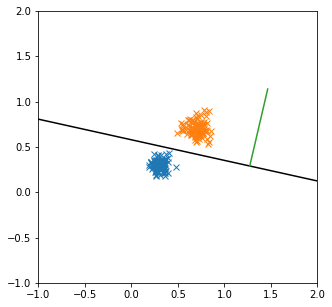

In [133]:
w = numpy.random.randn(3)
all_ws = [w] # History for animation

original_data = numpy.array([numpy.concatenate(([0],x,[1])) for x in tasty_apples] +
                      [numpy.concatenate(([1],x,[1])) for x in untasty_apples])

data = original_data[:]
numpy.random.shuffle(data)
for i in range(1000): # Up to 100 iterations
    incorrect = 0
    for d in data:
        yj, xj = int(d[0]), d[[1,2,4]] # yj, (x0, x1, 1)
        p = 1 if numpy.dot(w,xj)>0 else 0
        if yj != p:
            incorrect += 1
            w = w + 0.05*(yj - p)*xj
            all_ws.append(w)
    if incorrect == 0:
        all_ws.append(w)
        break
all_ws = numpy.array(all_ws)

# Done with perceptron, now plot lines
wj = all_ws[-1]
w,b = wj[:-1], wj[-1]

n_wj = wj / numpy.linalg.norm(wj)
n_w, n_b = n_wj[:-1], n_wj[-1]
center_point = -n_b/(2*n_w)
w_angle = numpy.arctan2(n_w[0],n_w[1])


fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.plot([center_point[0]+100*numpy.cos(w_angle),center_point[0]-100*numpy.cos(w_angle)],
        [center_point[1]-100*numpy.sin(w_angle),center_point[1]+100*numpy.sin(w_angle)],'k-')

ax.plot([center_point[0],center_point[0]+n_w[0]],[center_point[1],center_point[1]+n_w[1]])
ax.set_xlim([-1,2])
ax.set_ylim([-1,2])
pyplot.show()

In [134]:
n_wj = wj / numpy.linalg.norm(wj)
n_w, n_b = n_wj[:-1], n_wj[-1]
# Animate
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.set_xlim([-1,2])
ax.set_ylim([-1,2])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")

line, = ax.plot([],[],'k-')
center_dot, = ax.plot([],[],'r-')
text = ax.text(0,1,"Incorrect: NA")

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    center_dot.set_data([],[])
    return line,

# animation function.  This is called sequentially
def animate(i):
    wj = all_ws[i]
    w,b = wj[:-1], wj[-1]
    
    n_wj = wj / numpy.linalg.norm(wj)
    n_w, n_b = n_wj[:-1], n_wj[-1]
    
    w_angle = numpy.arctan2(n_w[0],n_w[1])
    
    center_point = -n_b/(2*n_w)
    center_dot.set_data([center_point[0],center_point[0]+n_w[0]],[center_point[1],center_point[1]+n_w[1]])
    
    line.set_data([center_point[0],center_point[0]+100*numpy.cos(w_angle),center_point[0]-100*numpy.cos(w_angle)],
        [center_point[1],center_point[1]-100*numpy.sin(w_angle),center_point[1]+100*numpy.sin(w_angle)])
    
    incorrect = 0
    for d in data:
        yj, xj = d[0], d[[1,2,4]] # yj, (x0, x1, 1)
        p = 1 if numpy.dot(wj,xj)>0 else 0
        if yj != p:
            incorrect += 1
    
    text.set_text("Incorrect: {}".format(incorrect))
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(all_ws), interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

As you can see, the algorithm finds a dividing line, but it's shakey and doesn't find the best solution. The next algorithm aims to correct this by finding the *best* solution. So what would be the best solution? If you look at the final frame of the above animation you will see that the line travels very close to the points... A better solution would maximize the distance between any particular point and the dividing line, that way if we gather more data they have some wiggle room near their cluster before accidentally crossing the line.

Introducing the **linear SVM**
The SVM (Support Vector Machine) tries to find the line with the maximum *margin*. By increasing the margin we can ensure that new points (like when we want to test to see if a new apple is tasty) are more likely to be on the correct side of the line.

Since the math here gets more complicated, I will start just talking about the general idea of the problem and use some nice libraries to demonstrate it.

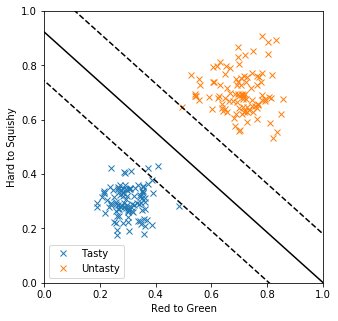

In [132]:
from sklearn.svm import LinearSVC

h = LinearSVC(C=10)

h.fit(numpy.concatenate((tasty_apples[:,[1,2]],untasty_apples[:,[1,2]])),
      [0 for _ in tasty_apples] + [1 for _ in untasty_apples])

w = h.coef_[0]
a = -w[0] / w[1]
xx = numpy.linspace(-5, 5)
yy = a * xx - (h.intercept_[0]) / w[1]
margin = 1 / numpy.sqrt(numpy.sum(h.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(tasty_apples[:,0],tasty_apples[:,1],'x',label="Tasty")
ax.plot(untasty_apples[:,0],untasty_apples[:,1],'x',label="Untasty")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel("Red to Green")
ax.set_ylabel("Hard to Squishy")
ax.plot(xx,yy,'k-')
ax.plot(xx,yy_up,'k--')
ax.plot(xx,yy_down,'k--')
ax.legend()
pyplot.show()

This shows the general approach to these problems. People have already written libraries which perform most of the operations we want, and they are often compiled by groups such that the end product is far better than any one person could do on their own.

### More advanced methods

These algorithms work on N-Dimentional input, but only if the data is *linearly seperable*. Basically if you can't draw a straight line through the data you're out of luck. For example consider the XOR dataset:

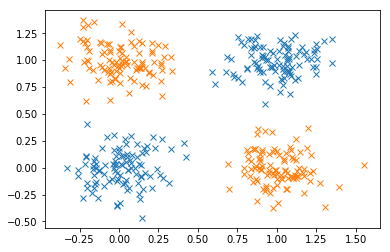

In [144]:
zz = numpy.random.randn(100,3)*0.15
oo = numpy.random.randn(100,3)*0.15 + 1
oz = numpy.random.randn(100,3)*0.15
oz[:,0] = oz[:,0] + 1
zo = numpy.random.randn(100,3)*0.15
zo[:,1] = oz[:,1] + 1

xor_true = numpy.concatenate((oo,zz))
xor_false = numpy.concatenate((oz,zo))

pyplot.plot(xor_true[:,0],xor_true[:,1],'x',label='XOR True')
pyplot.plot(xor_false[:,0],xor_false[:,1],'x',label='XOR False')

pyplot.show()

For the most part it's fairly obvious what colors go where, but let's see what SVM does

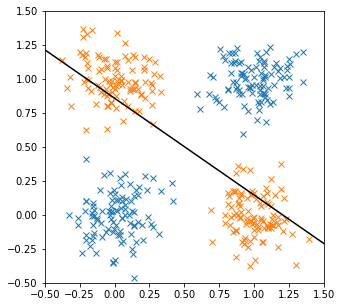

In [194]:
h = LinearSVC()

h.fit(numpy.concatenate((xor_true[:,[0,1]],xor_false[:,[0,1]])),
      [0 for _ in xor_true] + [1 for _ in xor_false])

w = h.coef_[0]
a = -w[0] / w[1]
xx = numpy.linspace(-5, 5)
yy = a * xx - (h.intercept_[0]) / w[1]
margin = 1 / numpy.sqrt(numpy.sum(h.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(xor_true[:,0],xor_true[:,1],'x',label="XOR True")
ax.plot(xor_false[:,0],xor_false[:,1],'x',label="XOR False")
ax.set_xlim([-0.5,1.5])
ax.set_ylim([-0.5,1.5])
ax.plot(xx,yy,'k-')
ax.plot(xx,yy_up,'k--')
ax.plot(xx,yy_down,'k--')
pyplot.show()

It fails miserably, as expected since there is no line that separates the two. We need a different algorithm!

### K-Nearest-Neighbors

Perhaps the simplest ML algorithm imaginable, just look at the points nearest to the one you want to predict, take the average of the K nearest values!

In [205]:
def plotit(h):
    # Draw the area of the fit
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    s = 0.01
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, s), numpy.arange(y_min, y_max, s))
    Z = h.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = pyplot.subplots(figsize=(5,5))
    ax.pcolormesh(xx, yy, Z, cmap='Greys')
    ax.plot(xor_true[:,0],xor_true[:,1],'x',label="XOR True")
    ax.plot(xor_false[:,0],xor_false[:,1],'x',label="XOR False")
    pyplot.xlim(x_min,x_max)
    pyplot.ylim(y_min,y_max)

    pyplot.show()


#### K = 3

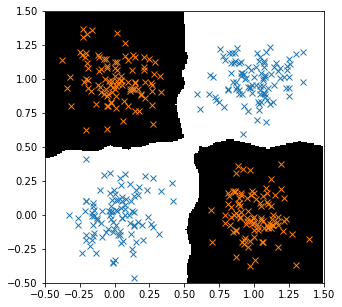

In [204]:
from sklearn.neighbors import KNeighborsClassifier

h = KNeighborsClassifier(3)

X = numpy.concatenate((xor_true[:,[0,1]],xor_false[:,[0,1]]))
y = [0 for _ in xor_true] + [1 for _ in xor_false]
h.fit(X,y)

plotit(h)

#### K = 5

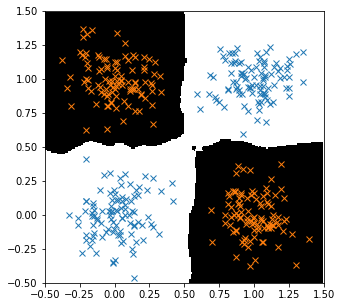

In [206]:
h = KNeighborsClassifier(5)

X = numpy.concatenate((xor_true[:,[0,1]],xor_false[:,[0,1]]))
y = [0 for _ in xor_true] + [1 for _ in xor_false]
h.fit(X,y)

plotit(h)

#### K = 1

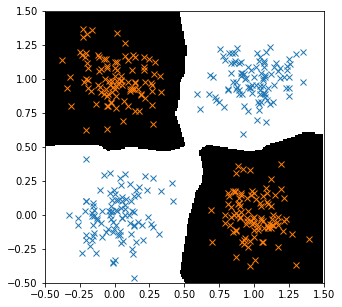

In [207]:
h = KNeighborsClassifier(1)

X = numpy.concatenate((xor_true[:,[0,1]],xor_false[:,[0,1]]))
y = [0 for _ in xor_true] + [1 for _ in xor_false]
h.fit(X,y)

plotit(h)

KNN is useful because it can figure out any dataset (zero bias), however there are some problems with this algorithm:
- The time to calculate the distance to all other points is quite long if you have many
- A single random misplaced point can make wonky decision boundaries (high variance)
- The higher the dimension of the space the less useful *distance* is! In very high dimentional spaces all points look basically the same distance from you!

To deal with the first part, let's try to only look at nearby points to find the nearest. The way we do this is divide the space in half over and over and over and store points in each half. The number of points that can be stored in $d$ layers of divisions is given by $2^d$, thus if we have $N$ points lets see how many layers we need:
$$2^d = N$$
$$d = log_2 N$$
$log_2 N$ 
is much smaller than $N$, thus if we only have to check which side something is on $d$ times we will find the correct prediction *much* faster than if we have to check $N$ points. We call this a KDTree

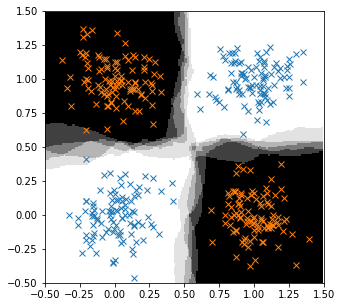

In [235]:
from sklearn.neighbors import KDTree

X = numpy.concatenate((xor_true[:,[0,1]],xor_false[:,[0,1]]))
y = numpy.array([0 for _ in xor_true] + [1 for _ in xor_false])

tree = KDTree(X)
class KDPred:
    def __init__(self,t,k=3):
        self.t = t
        self.k = k
    def predict(self,X):
        dist, indx = self.t.query(X,k=self.k)
        classes = y[indx]
        sums = numpy.sum(classes,axis=1)/self.k
        return sums

plotit(KDPred(tree,5))

Nice!

Now let's try making these *trees* like above, but attempt to make it so that we group the points of the same type together into *pure leaves*. Then we don't even need to store the points anymore, we just store the location of the boundaries between leaves which are all of one type. Then to test a point we just look at which leaf it falls into. 

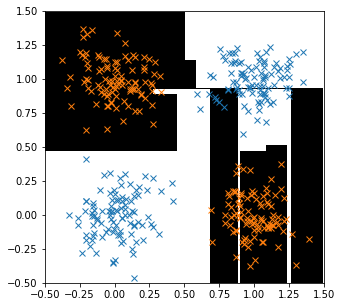

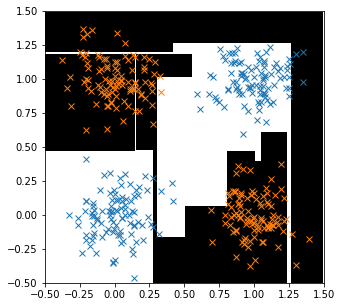

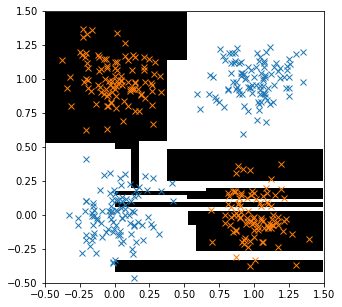

In [246]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(1)
forest.fit(X,y)

plotit(forest)

forest.fit(X,y)

plotit(forest)

forest.fit(X,y)

plotit(forest)

This classifier looks different every time we run it. And none of the solutions it finds seem to be particularly good. However what if we take the average solution of, say, 20 of them?

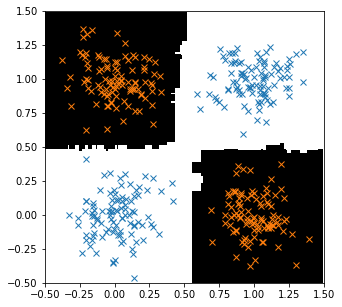

In [245]:
forest = RandomForestClassifier(20)
forest.fit(X,y)

plotit(forest)

That looks almost exactly like how we think this dataset was made! The region is divided roughly into four squares of alternating classification.